# ImmoEliza Data Analysis (test)

**This repository is contains Data Analysis for a fictional real estate company called "ImmoEliza". I created it as part of my [BeCode](https://www.becode.org) AI Bootcamp training in 2023.**

The data used in this project was sourced from the repository [ImmoEliza: Collecting Data](https://github.com/DeFre/ImmoEliza-collecting-data) which was used to collect data on 10.000 properties from Immoweb.

In [1]:
import numpy as np
import re
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
import time

pd.set_option('display.min_rows', 10)

## Import Data

In [2]:
properties_raw = pd.read_csv("../data/scraped_data_10_Myt.csv")
display(properties_raw)

,Type of property,Location,postal code,immo code,Price,Address,Bedrooms,Energy class,Primary energy consumption,Furnished,...,Number of frontages,Construction year,Building condition,Outdoor parking space,Bathrooms,Shower rooms,Office,Toilets,Kitchen type,Heating type
0,penthouse,turnhout,2300,10666429,€,Grote Markt 22,4,C,218,No,...,4,1997,As new,0,1,0,0,2,0,Gas
1,house,essen,2910,10666428,€469000,Heidestatiestraat 26,3,D,390,No,...,4,0,0,0,1,0,0,2,Installed,0
2,house,bierges,1301,10666426,€1395000,"Rue de Wavre, 27",5,C,178,0,...,4,1988,Good,0,2,3,Yes,4,Hyper equipped,Fuel oil
3,apartment,arlon,6700,10666424,€285000,Avenue de Longwy 340,2,D,299,0,...,2,0,Good,0,2,0,0,2,Installed,Electric
4,house,arlon,6700,10666423,€285000,Avenue de Longwy 340,2,D,299,0,...,2,0,Good,0,2,0,0,2,Installed,Electric
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10134,villa,schilde,2970,10642946,€1199000,Donksesteenweg 212,6,B,199,No,...,0,0,As new,0,2,0,No,3,Installed,Gas
10135,duplex,bierbeek%20korbeek-lo,3360,10531808,€450000,Herbert Hooverplein 14,3,B,120,No,...,2,2007,Good,0,2,0,0,0,Hyper equipped,Gas
10136,penthouse,braine-l%27alleud,1420,10642943,€699000,Avenue Alphonse Allard 288,3,Not specified,Not specified,No,...,3,2021,0,0,2,0,0,0,0,0
10137,house,wevelgem,8560,10642937,€340000,Markeplaats 9,4,B,161,0,...,0,1967,0,0,0,0,No,0,0,0


## Export Data
The two blocks below can be turned into Code Blocks depending on how you want to export your data. Keep them as markdown if you want to use Run All (Above).

### Overwrite outputfile
"""This codeblock OVERWRITES THE EXISTING OUTPUT FILE"""
data_to_save = properties_raw
reference = ""  #add/change reference (datasource/user). Add leading underscore to increase readability
output_filename = "saved_data" + reference + ".csv" #assemble filename
data_to_save.to_csv(output_filename)

### Export to new timestamped file in /datadump (and overwrite existing output file)
"""This codeblock saves the dataframe in a NEW FILE WITH TIMESTAMP in the /datadump folder"""
data_to_save = properties_raw
data_to_save.to_csv("../data/saved_data_myt.csv") #uncomment this line if you want to overwrite saved_data.csv AND create a timestamped dump
reference = ""    #add/change reference (datasource/user). Add leading underscore to increase readability
timestamp = time.strftime("%Y%m%d-%H%M%S") #add date and time of creation
output_path = "../data/datadump/"     #leave empty to save the file in the same folder as your code, 
output_filename = output_path + "saved_data_myt_" + reference + timestamp  + ".csv" #assemble filename
data_to_save.to_csv(output_filename)

## Cleaning Data

### Remove "empty" rows and rows without a price

In [3]:
# Remove "empty" rows and rows without a price

print(properties_raw.shape[0])
#properties_raw = properties_raw.drop(properties_raw[(properties_raw.Price == 0) & (properties_raw.Address == 0) & (properties_raw.Bedrooms == 0) & (properties_raw.Furnished == 0)].index, inplace=True) #remove lines full of 0
properties_raw = properties_raw[properties_raw.loc[:, "Address"].astype(str).str.strip() != '0'] #solution by Jonathan #removes "empty" rows
print(properties_raw.shape[0])
properties_raw = properties_raw[properties_raw.loc[:, "Price"].astype(str).str.strip() != '€'] #removes rows without a price
#display(properties_raw)
print(properties_raw.shape[0])


10139
9446
8977


### Remove all non-numerical data from Price

In [4]:
# Remove all non-numerical data from Price, drop properties without a price and with prices over 3M or under 10K

print("number of properties before: ",properties_raw.shape[0])
properties_raw["Price2"] = properties_raw.loc[:, "Price"].str.replace("\D", "", regex = True)
properties_raw = properties_raw[properties_raw.loc[:, "Price2"].astype(str).str.strip() != ''] #remove rows without a price
properties_raw["Price2"] = properties_raw["Price2"].astype(int) #Turn "Price 2 into an Integer"
properties_raw = properties_raw.drop(properties_raw[properties_raw['Price2'] > 30000000].index) #removes properties costing more than 3M
properties_raw = properties_raw.drop(properties_raw[properties_raw['Price2'] < 9999].index) #removes properties costing less than 10K
print("number of properties after: ",properties_raw.shape[0])



number of properties before:  8977
number of properties after:  8700


In [5]:
# Turn Price into an integer but keep the original Price column a Price_orig
properties_raw["Price_orig"] = properties_raw["Price"]
properties_raw["Price"] = properties_raw["Price2"]
properties_raw = properties_raw.drop(columns=["Price2"])
display(properties_raw)

,Type of property,Location,postal code,immo code,Price,Address,Bedrooms,Energy class,Primary energy consumption,Furnished,...,Construction year,Building condition,Outdoor parking space,Bathrooms,Shower rooms,Office,Toilets,Kitchen type,Heating type,Price_orig
1,house,essen,2910,10666428,469000,Heidestatiestraat 26,3,D,390,No,...,0,0,0,1,0,0,2,Installed,0,€469000
2,house,bierges,1301,10666426,1395000,"Rue de Wavre, 27",5,C,178,0,...,1988,Good,0,2,3,Yes,4,Hyper equipped,Fuel oil,€1395000
3,apartment,arlon,6700,10666424,285000,Avenue de Longwy 340,2,D,299,0,...,0,Good,0,2,0,0,2,Installed,Electric,€285000
4,house,arlon,6700,10666423,285000,Avenue de Longwy 340,2,D,299,0,...,0,Good,0,2,0,0,2,Installed,Electric,€285000
5,apartment,antwerp,2000,10666422,425000,"Grote steenweg, 511",2,C,254,0,...,0,As new,0,1,0,0,0,Installed,0,€425000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10134,villa,schilde,2970,10642946,1199000,Donksesteenweg 212,6,B,199,No,...,0,As new,0,2,0,No,3,Installed,Gas,€1199000
10135,duplex,bierbeek%20korbeek-lo,3360,10531808,450000,Herbert Hooverplein 14,3,B,120,No,...,2007,Good,0,2,0,0,0,Hyper equipped,Gas,€450000
10136,penthouse,braine-l%27alleud,1420,10642943,699000,Avenue Alphonse Allard 288,3,Not specified,Not specified,No,...,2021,0,0,2,0,0,0,0,0,€699000
10137,house,wevelgem,8560,10642937,340000,Markeplaats 9,4,B,161,0,...,1967,0,0,0,0,No,0,0,0,€340000


### Turns Furnished, Terrace & Office Binary

In [6]:
# Turn Yes/No into 1/0

for i in ["Furnished", "Terrace", "Office"]:
    print(properties_raw[[i]].value_counts())
    properties_raw[i] = properties_raw[i].map({'Yes': 1, 'No': 0, '0':0, 0:0, 1:1})
    print(properties_raw[[i]].value_counts())
#display(properties_raw)

Furnished
0            4441
No           4013
Yes           246
Name: count, dtype: int64
Furnished
0            8454
1             246
Name: count, dtype: int64
Terrace
0          6425
Yes        2275
Name: count, dtype: int64
Terrace
0          6425
1          2275
Name: count, dtype: int64
Office
0         5462
No        2016
Yes       1222
Name: count, dtype: int64
Office
0         7478
1         1222
Name: count, dtype: int64


There seem to be a lot of properties marked as not having terrace, yet including a terrace surface. If a property has a terrace surface we will assume this implies it has a terrace. Will this make a difference?

In [7]:
properties_raw["Terrace2"] = np.where(properties_raw["Terrace surface"] !=0, 1, properties_raw["Terrace"])
print(properties_raw["Terrace"].value_counts())
print(properties_raw["Terrace2"].value_counts())

Terrace
0    6425
1    2275
Name: count, dtype: int64
Terrace2
1    5219
0    3481
Name: count, dtype: int64


Yes. As you can see the number of terraces has more than doubled. 

In [8]:
# Replace the values in Terrace with the ones from Terrace2 and drop Terrace
properties_raw["Terrace"] = properties_raw["Terrace2"]
properties_raw = properties_raw.drop(["Terrace2"], axis=1)

### Property type & subtype
The column "Type of property" is a bit too specific. We will create two *supertypes* called "house" and "apartment" as they are not included in our scrape. 
Afterwards we will refer to these two supertypes as *"property_type"* and use *"property_subtype"* to refer to "kot", "castle", "villa", ...

In [9]:
properties_raw.rename(columns = {'Type of property':'property_subtype'}, inplace = True)
df_proptype = pd.read_csv("../data/propertytype.csv", encoding="latin-1")
properties_raw = properties_raw.merge(df_proptype, on=['property_subtype'], how='left')
properties_raw.sample(10)

,property_subtype,Location,postal code,immo code,Price,Address,Bedrooms,Energy class,Primary energy consumption,Furnished,...,Building condition,Outdoor parking space,Bathrooms,Shower rooms,Office,Toilets,Kitchen type,Heating type,Price_orig,property_type
1872,villa,kluisbergen,9690,10662708,239000,Grote Markt 35,4,F,849,0,...,To renovate,0,1,0,0,1,Semi equipped,Fuel oil,€239000,house
1987,house,turnhout,2300,10662263,425000,PARKLAAN 46,3,A,95,0,...,Good,0,1,0,1,2,0,Gas,€425000,house
6201,house,skiros,340%2007,10650406,500000,Rue de Wynants 9,2,Not specified,Not specified,0,...,Good,0,2,0,0,0,0,Electric,€500000,house
2393,house,monceau-sur-sambre,6031,10660397,135000,Chaussée de Lodelinsart 115,3,G,968,0,...,To be done up,0,1,0,0,0,Installed,Gas,€135000,house
2249,house,landen,3400,10661383,260000,Postlaan 1W4,4,E,461,0,...,0,0,2,0,0,1,Installed,0,€260000,house
4916,house,denderleeuw,9470,10653953,299000,Steenweg 299,3,D,310,0,...,Good,0,1,0,0,1,Installed,Gas,€299000,house
8011,house,alveringem,8690,10645184,699000,Esenweg 197,3,E,409,0,...,As new,0,1,0,1,2,USA installed,0,€699000,house
4433,apartment,willebroek,2830,10655081,56631,Valkebeekstraat 24,1,C,296,0,...,Good,0,1,0,0,1,Semi equipped,Gas,€56631.,apartment
4522,apartment,knokke-heist,8300,10654879,429000,Dumortierlaan 89,1,B,115,0,...,0,0,1,0,0,0,0,0,€429000,apartment
4621,house,drongen,9031,10654687,850000,"Kortrijksesteenweg, 390 bus 001",4,B,198,0,...,Good,0,1,0,0,2,Not installed,Gas,€850000,house


### Energy Class
Due to differences in definition in each region, it will be very hard to compare energy classes. But before we can discover that we have a bit of cleaning up to do. Our dataset includes a few weird Energy Classes ('G_F', 'C_B', 'G_A++'). As each of them only occurs once, we will add them to "not specified". Now the different categories at least look "normal".

In [10]:
#There were 3 weird variables in Energy Class with only one occurence, namely 'G_F', 'C_B', 'G_A++'. Added them tot "Not specified"

properties_raw["Energy class"]=np.where(properties_raw["Energy class"].isin(['G_F', 'C_B', 'G_A++']), "Not specified", properties_raw["Energy class"])

In [11]:
print(properties_raw[["Energy class"]].value_counts())

Energy class 
Not specified    1954
B                1386
C                1299
D                1100
F                1083
E                 793
A                 560
G                 471
A++                31
A+                 23
Name: count, dtype: int64


### Cleaning Postal codes
Postal Codes should be 4 numeric digits, but we have some errors. 

In [12]:
print("before:",properties_raw.shape[0])
properties_raw.rename(columns = {'postal code':'Postcode'}, inplace = True)
properties_raw["Postcode"] = properties_raw.loc[:, "Postcode"].astype(str).str.replace("\D", "", regex = True)
properties_raw['Postcode'] = properties_raw['Postcode'].astype(int)
properties_raw = properties_raw.drop(properties_raw[properties_raw['Postcode'] > 9999].index) #removes postal codes over 4 digits
print("after removing too high numbers:",properties_raw.shape[0])
properties_raw = properties_raw.drop(properties_raw[properties_raw['Postcode'] < 999].index) #removes postal codes of less than 4 digits
print("after:",properties_raw.shape[0])

before: 8700
after removing too high numbers: 8595
after: 8595


### Add Regions

In [13]:
df_localities = pd.read_csv("../data/postal_code-municipality-province.csv", encoding="latin-1")
df_localities = df_localities[['Postcode', 'Provincie']].drop_duplicates().reset_index(drop=True)
print(df_localities.head())

   Postcode                       Provincie
0      1000  Brussels Hoofdstedelijk Gewest
1      1030  Brussels Hoofdstedelijk Gewest
2      1040  Brussels Hoofdstedelijk Gewest
3      1050  Brussels Hoofdstedelijk Gewest
4      1060  Brussels Hoofdstedelijk Gewest


In [14]:
df_localities['Gemeenschap'] = np.where(
    df_localities.Provincie.isin(['Vlaams-Brabant', 'Antwerpen', 'Limburg', 'West-Vlaanderen', 'Oost-Vlaanderen']),
    'Flanders',
    np.where(df_localities.Provincie == 'Brussels Hoofdstedelijk Gewest',
             'Brussels',
             'Wallonia'
    )
)

In [15]:
df_localities["Postcode"].astype(int)
df_localities["Provincie"].astype(str)
df_localities["Gemeenschap"].astype(str)

0       Brussels
1       Brussels
2       Brussels
3       Brussels
4       Brussels
          ...   
1138    Flanders
1139    Flanders
1140    Flanders
1141    Flanders
1142    Flanders
Name: Gemeenschap, Length: 1143, dtype: object

In [16]:
df_localities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Postcode     1143 non-null   int64 
 1   Provincie    1143 non-null   object
 2   Gemeenschap  1143 non-null   object
dtypes: int64(1), object(2)
memory usage: 26.9+ KB


In [17]:
print(df_localities.sample(10))

      Postcode                       Provincie Gemeenschap
473       8300                 West-Vlaanderen    Flanders
326       5170                           Namur    Wallonia
1076      8583                 West-Vlaanderen    Flanders
3         1050  Brussels Hoofdstedelijk Gewest    Brussels
362       6180                         Hainaut    Wallonia
149       2860                       Antwerpen    Flanders
1050      7951                         Hainaut    Wallonia
713       3732                         Limburg    Flanders
641       1981                  Vlaams-Brabant    Flanders
289       4700                         Liï¿½ge    Wallonia


In [18]:
properties_raw = properties_raw.merge(df_localities, on=['Postcode'], how='left')
properties_raw.rename(columns = {'Provincie':'Province', 'Gemeenschap':'Region'}, inplace = True)
properties_raw.head()

,property_subtype,Location,Postcode,immo code,Price,Address,Bedrooms,Energy class,Primary energy consumption,Furnished,...,Bathrooms,Shower rooms,Office,Toilets,Kitchen type,Heating type,Price_orig,property_type,Province,Region
0,house,essen,2910,10666428,469000,Heidestatiestraat 26,3,D,390,0,...,1,0,0,2,Installed,0,€469000,house,Antwerpen,Flanders
1,house,bierges,1301,10666426,1395000,"Rue de Wavre, 27",5,C,178,0,...,2,3,1,4,Hyper equipped,Fuel oil,€1395000,house,Brabant wallon,Wallonia
2,apartment,arlon,6700,10666424,285000,Avenue de Longwy 340,2,D,299,0,...,2,0,0,2,Installed,Electric,€285000,apartment,Luxembourg,Wallonia
3,house,arlon,6700,10666423,285000,Avenue de Longwy 340,2,D,299,0,...,2,0,0,2,Installed,Electric,€285000,house,Luxembourg,Wallonia
4,apartment,antwerp,2000,10666422,425000,"Grote steenweg, 511",2,C,254,0,...,1,0,0,0,Installed,0,€425000,apartment,Antwerpen,Flanders


### seperate Dataframe for Primary Energy Consumption vs Price

In [19]:
energy_price_df = properties_raw.loc[:,["Price", "Energy class", "Primary energy consumption", "Postcode", "Province", "Region"]]
display(energy_price_df.sample(10))

,Price,Energy class,Primary energy consumption,Postcode,Province,Region
4061,255000,F,534,9660,Oost-Vlaanderen,Flanders
497,700000,C,223,5020,Namur,Wallonia
8262,609000,Not specified,Not specified,9280,Oost-Vlaanderen,Flanders
1998,144000,Not specified,Not specified,7080,Hainaut,Wallonia
3103,325000,G,457,1200,Brussels Hoofdstedelijk Gewest,Brussels
8591,450000,B,120,3360,Vlaams-Brabant,Flanders
6045,319000,F,888,2812,Antwerpen,Flanders
5096,349000,D,310,9320,Oost-Vlaanderen,Flanders
6008,225000,F,528,9200,Oost-Vlaanderen,Flanders
7774,462500,A,99,1932,Vlaams-Brabant,Flanders


In [20]:
properties_raw["Primary energy consumption"]=pd.to_numeric(properties_raw["Primary energy consumption"], errors='coerce')
display(properties_raw.sample(10))

,property_subtype,Location,Postcode,immo code,Price,Address,Bedrooms,Energy class,Primary energy consumption,Furnished,...,Bathrooms,Shower rooms,Office,Toilets,Kitchen type,Heating type,Price_orig,property_type,Province,Region
639,new-real-estate-project-houses,veurne,8630,10666037,12000,Sasstraat 5,0,Not specified,NaN,0,...,0,0,0,0,0,0,€12.000.,house,West-Vlaanderen,Flanders
4905,house,trooz,4870,10653858,79000,Grand rue 191,3,F,510.0,0,...,1,1,1,1,Not installed,0,€79000,house,Liï¿½ge,Wallonia
6730,apartment,antwerp,2000,10648614,520000,Sint-Katelijnevest 24,3,B,177.0,0,...,2,0,0,0,0,Gas,€520000,apartment,Antwerpen,Flanders
703,house,zwijnaarde,9052,10665926,545000,Brusselsesteenweg 690,4,Not specified,NaN,0,...,0,0,0,0,Installed,0,€545000,house,Oost-Vlaanderen,Flanders
3138,house,anzegem,8570,10658459,297500,Izegemstraat 355,3,C,216.0,0,...,0,0,0,0,0,Gas,€297500,house,West-Vlaanderen,Flanders
7129,apartment,kortrijk,8500,10647430,365000,Doorniksestraat 33,2,B,183.0,0,...,1,0,0,1,Installed,Gas,€365000,apartment,West-Vlaanderen,Flanders
7023,duplex,antwerp,2018,10647745,265000,Sint-Jansvliet 5,1,B,152.0,0,...,1,0,0,2,Installed,Gas,€265000,apartment,Antwerpen,Flanders
3759,apartment,antwerp,2000,10656649,745000,Brusselsesteenweg 31,2,B,124.0,0,...,2,0,0,2,Semi equipped,Gas,€745000,apartment,Antwerpen,Flanders
6279,apartment,mechelen,2800,10649928,340000,Raghenoplein 15 B4,2,B,145.0,0,...,1,0,0,0,0,Gas,€340000,apartment,Antwerpen,Flanders
2618,apartment,oostende,8400,10659835,165900,Karel Janssenslaan 1,1,F,576.0,1,...,1,0,0,0,0,Electric,€165900,apartment,West-Vlaanderen,Flanders


In [21]:
print("dropna:",energy_price_df.shape[0])
properties_raw = properties_raw.dropna()
print("dropna:",properties_raw.shape[0])
properties_raw = properties_raw.drop(properties_raw[properties_raw["Primary energy consumption"] > 2000].index)
print("under2000:",properties_raw.shape[0])
display(properties_raw.sample(10))


dropna: 8595
dropna: 6633
under2000: 6623


,property_subtype,Location,Postcode,immo code,Price,Address,Bedrooms,Energy class,Primary energy consumption,Furnished,...,Bathrooms,Shower rooms,Office,Toilets,Kitchen type,Heating type,Price_orig,property_type,Province,Region
4292,house,oostrozebeke,8780,10655298,230000,Vredestraat 12,3,F,754.0,0,...,1,0,0,0,0,Gas,€230000,house,West-Vlaanderen,Flanders
3753,apartment,libramont-chevigny,6800,10656656,150000,Avenue de Bouillon 92,1,B,115.0,0,...,1,0,0,1,Not installed,Gas,€150000,apartment,Luxembourg,Wallonia
7403,house,philippeville,5600,10646626,185000,Faubourg Saint Germain 65,4,E,360.0,0,...,1,0,0,1,Installed,Fuel oil,€185000,house,Namur,Wallonia
2295,house,ixelles,1050,10661222,875000,Chaussée de Vleurgat 293,2,F,330.0,1,...,2,2,1,3,USA hyper equipped,Gas,€875000,house,Brussels Hoofdstedelijk Gewest,Brussels
5469,apartment,mol,2400,10652484,219000,Kapittelhof 22,1,B,188.0,0,...,1,0,0,0,0,Gas,€219000,apartment,Antwerpen,Flanders
7997,mansion,dentergem,8720,10500248,499000,Sint-Janstraat 185,3,D,325.0,0,...,1,0,0,1,0,0,€499000,house,West-Vlaanderen,Flanders
7067,apartment,putte,2580,10647595,259000,Leuvensesteenweg 215,2,C,269.0,0,...,1,0,0,1,Installed,Gas,€259000,apartment,Antwerpen,Flanders
6737,house,moerbeke,9180,10648604,375000,"Dorpsstraat, 21",4,C,225.0,0,...,1,0,0,1,0,Gas,€375000,house,Oost-Vlaanderen,Flanders
4754,house,ixelles,1050,10654247,1960000,"Avenue Delleur, 8",6,C,128.0,0,...,4,2,1,0,Hyper equipped,Gas,€1960000,house,Brussels Hoofdstedelijk Gewest,Brussels
8540,house,nijlen,2560,10643105,209000,Donk 62,2,D,347.0,0,...,1,0,0,1,0,0,€209000,house,Antwerpen,Flanders


### Reindex dataframe
Now that we have cleaned up and manipulated all data, let's regroup the columns so they are ordered more logically.

In [22]:
new_columns = [ 'property_type', 'property_subtype', 'immo code', 'Location', 'Postcode', 'Province', 'Region', 'Price', 'Address', 'Energy class', 'Primary energy consumption', 'Furnished', 'Terrace', 'Terrace surface', 'Surface of the plot', 'Living room surface', 'Number of frontages', 'Construction year', 'Building condition', 'Outdoor parking space', 'Bedrooms', 'Bathrooms', 'Shower rooms', 'Office', 'Toilets', 'Kitchen type', 'Heating type', 'Price2', 'Price_orig', 'Terrace2']
properties_raw = properties_raw.reindex(columns=new_columns)

### .info() & .describe()

In [23]:
properties_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6623 entries, 0 to 8594
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   property_type               6623 non-null   object 
 1   property_subtype            6623 non-null   object 
 2   immo code                   6623 non-null   int64  
 3   Location                    6623 non-null   object 
 4   Postcode                    6623 non-null   int32  
 5   Province                    6623 non-null   object 
 6   Region                      6623 non-null   object 
 7   Price                       6623 non-null   int32  
 8   Address                     6623 non-null   object 
 9   Energy class                6623 non-null   object 
 10  Primary energy consumption  6623 non-null   float64
 11  Furnished                   6623 non-null   int64  
 12  Terrace                     6623 non-null   int64  
 13  Terrace surface             6623 non-n

In [24]:
# Create a list of all columns containing numerical data (integers and floats)
number_cols = list(properties_raw.select_dtypes(include='number'))
number_cols

['immo code',
 'Postcode',
 'Price',
 'Primary energy consumption',
 'Furnished',
 'Terrace',
 'Terrace surface',
 'Surface of the plot',
 'Living room surface',
 'Number of frontages',
 'Construction year',
 'Outdoor parking space',
 'Bedrooms',
 'Bathrooms',
 'Shower rooms',
 'Office',
 'Toilets',
 'Price2',
 'Terrace2']

In [25]:
# Create a list of all columns containing objects (strings)
object_cols = list(properties_raw.select_dtypes(include='object'))
object_cols

['property_type',
 'property_subtype',
 'Location',
 'Province',
 'Region',
 'Address',
 'Energy class',
 'Building condition',
 'Kitchen type',
 'Heating type',
 'Price_orig']

In [26]:
properties_raw.describe()

,immo code,Postcode,Price,Primary energy consumption,Furnished,Terrace,Terrace surface,Surface of the plot,Living room surface,Number of frontages,Construction year,Outdoor parking space,Bedrooms,Bathrooms,Shower rooms,Office,Toilets,Price2,Terrace2
count,6.623000e+03,6623.000000,6.623000e+03,6623.000000,6623.000000,6623.000000,6623.000000,6623.000000,6623.000000,6623.000000,6623.000000,6623.0,6623.000000,6623.000000,6623.000000,6623.000000,6623.000000,0.0,0.0
mean,1.064334e+07,5180.100710,4.286691e+05,323.162971,0.028537,0.621471,8.823796,788.168504,16.977805,2.114148,1261.494338,0.0,3.037445,1.239167,0.365846,0.159746,1.327797,NaN,NaN
std,5.501526e+04,3121.481775,4.559258e+05,220.501734,0.166514,0.485057,23.550973,4476.607741,35.447171,1.439283,945.341303,0.0,1.641297,1.076026,2.198904,0.366398,1.239352,NaN,NaN
min,9.360253e+06,1000.000000,1.000000e+04,-30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,-1.000000,0.000000,0.000000,NaN,NaN
25%,1.064758e+07,2170.000000,2.290000e+05,169.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,2.000000,1.000000,0.000000,0.000000,1.000000,NaN,NaN
50%,1.065438e+07,4630.000000,3.200000e+05,274.000000,0.000000,1.000000,0.000000,162.000000,0.000000,2.000000,1948.000000,0.0,3.000000,1.000000,0.000000,0.000000,1.000000,NaN,NaN
75%,1.066039e+07,8450.000000,4.690000e+05,419.000000,0.000000,1.000000,9.000000,600.000000,32.000000,3.000000,1979.000000,0.0,4.000000,1.000000,0.000000,0.000000,2.000000,NaN,NaN
max,1.066718e+07,9991.000000,6.975000e+06,1860.000000,1.000000,1.000000,663.000000,160737.000000,2340.000000,4.000000,2025.000000,0.0,30.000000,27.000000,116.000000,1.000000,20.000000,NaN,NaN


Describe() shows we have an empty column, namely 'Outdoor parking space'. To keep things clean, we will drop this column. But to be sure (in the future), we will check the sum of the column before dropping it.

In [27]:
if properties_raw['Outdoor parking space'].sum() ==0:
    properties_raw = properties_raw.drop(['Outdoor parking space'], axis=1)
    print("The column 'Outdoor parking space' was dropped as it was empty")
else: 
    print("The column 'Outdoor parking space' is not empty")

The column 'Outdoor parking space' was dropped as it was empty


### Display Data

In [28]:
display(properties_raw.sample(15))

,property_type,property_subtype,immo code,Location,Postcode,Province,Region,Price,Address,Energy class,...,Bedrooms,Bathrooms,Shower rooms,Office,Toilets,Kitchen type,Heating type,Price2,Price_orig,Terrace2
230,apartment,apartment,10666879,bruxelles,1000,Brussels Hoofdstedelijk Gewest,Brussels,365000,Avenue Louise 433,G,...,5,1,1,0,1,Installed,Gas,NaN,€365000,NaN
4195,house,house,10655572,spontin,5530,Namur,Wallonia,389000,Rue du Commerce 1,D,...,4,0,1,0,2,Installed,Fuel oil,NaN,€389000,NaN
2863,house,house,10659257,appelterre-eichem,9400,Oost-Vlaanderen,Flanders,445000,Keizersplein 71,A+,...,3,1,0,1,2,Installed,0,NaN,€445000,NaN
8374,house,house,10643559,eupen,4700,Liï¿½ge,Wallonia,199000,Bergstrasse 44,E,...,2,2,0,0,0,Installed,Gas,NaN,€199000,NaN
7684,house,house,10645805,la%20louvi%C3%A8re%20houdeng-goegnies,7110,Hainaut,Wallonia,80000,Chaussée Paul Houtart 232,E,...,2,1,0,1,2,Semi equipped,Gas,NaN,€80000,NaN
5345,apartment,apartment,10652838,schaerbeek,1030,Brussels Hoofdstedelijk Gewest,Brussels,165000,Av. Henri Conscience 74,F,...,1,0,1,0,1,0,Gas,NaN,€165000,NaN
6939,apartment,apartment,10402518,knokke-heist,8301,West-Vlaanderen,Flanders,330000,"Gemeenteplein, 1a",A,...,2,0,0,0,0,0,0,NaN,€330000,NaN
2943,house,house,10659058,bissegem,8501,West-Vlaanderen,Flanders,549000,Doorniksestraat 33,D,...,4,2,0,0,2,Hyper equipped,Gas,NaN,€549000,NaN
1939,house,house,10662400,forest,1190,Brussels Hoofdstedelijk Gewest,Brussels,1100000,Place Brugmann 10B,E,...,5,3,7,1,3,Installed,Gas,NaN,€1100000,NaN
2474,house,house,10660142,lede,9340,Oost-Vlaanderen,Flanders,219000,Hoogstraat 20,E,...,3,1,0,0,1,Installed,Gas,NaN,€219000,NaN


## Graphs

In [29]:
ordered_E_class = ['A++', 'A+', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'Not specified']
ordered_E_class_aplus_to_g = ['A+', 'A', 'B', 'C', 'D', 'E', 'F', 'G'] #a list of energy classes, excluding "A++" and "Not specified"

### Energy Class
(Including Not specified)

<Axes: xlabel='Energy class', ylabel='count'>

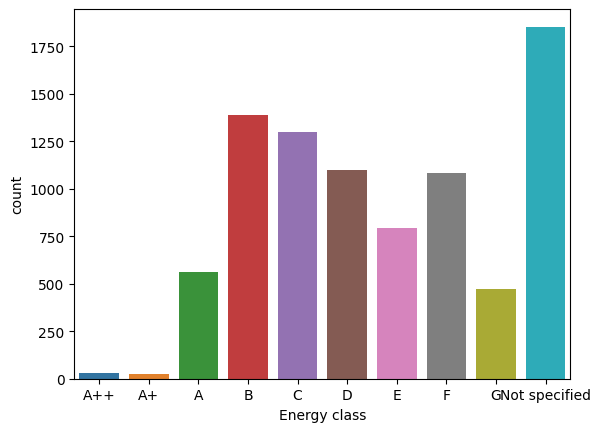

In [30]:
sns.countplot(x="Energy class", data=energy_price_df, order=ordered_E_class)

### Energy Class vs Price

[Text(0.5, 1.0, 'Energy Class versus Price'), Text(0, 0.5, 'Price in €')]

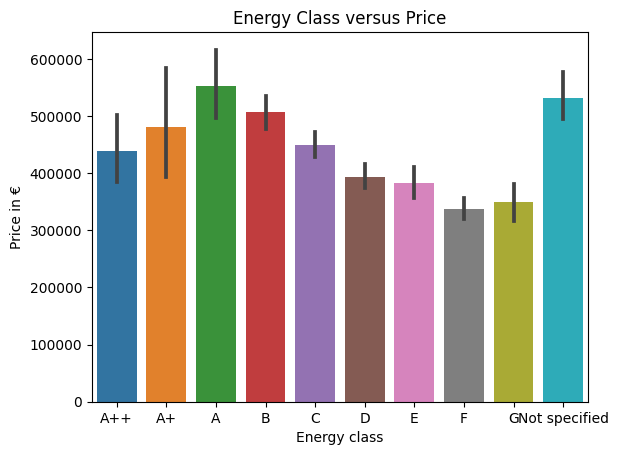

In [31]:
sns.barplot(x="Energy class", y="Price", data=energy_price_df, order=ordered_E_class).set(title = "Energy Class versus Price", ylabel='Price in €')

[Text(0.5, 1.0, 'Energy Class versus Price per Region'),
 Text(0, 0.5, 'Price in €')]

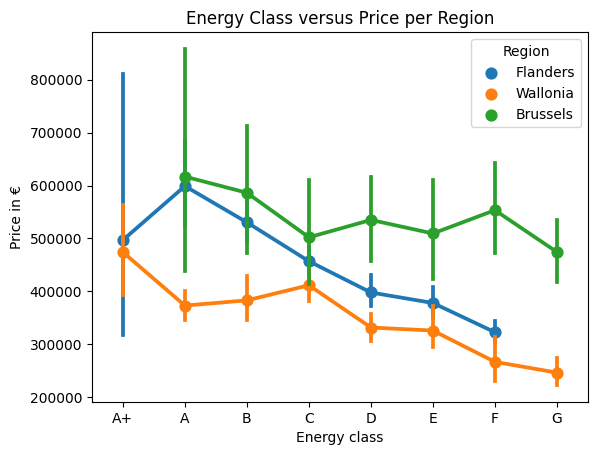

In [32]:
sns.pointplot(x="Energy class", y="Price", hue = "Region",data=energy_price_df, order=ordered_E_class_aplus_to_g,).set(title = "Energy Class versus Price per Region", ylabel='Price in €')

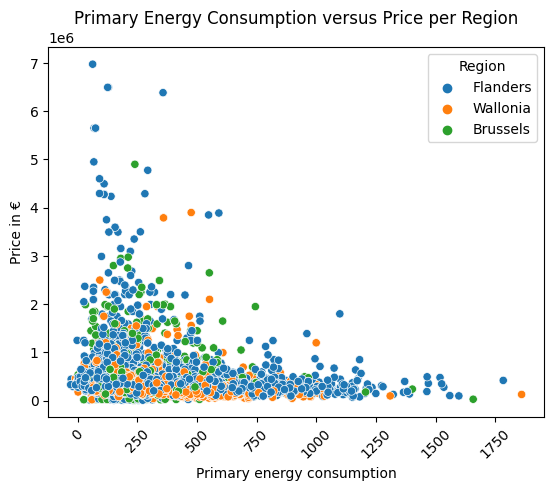

In [33]:
sns.scatterplot(x="Primary energy consumption", y="Price", hue = "Region",data=properties_raw).set(title = "Primary Energy Consumption versus Price per Region", ylabel='Price in €')
plt.xticks(rotation=45)
plt.show()

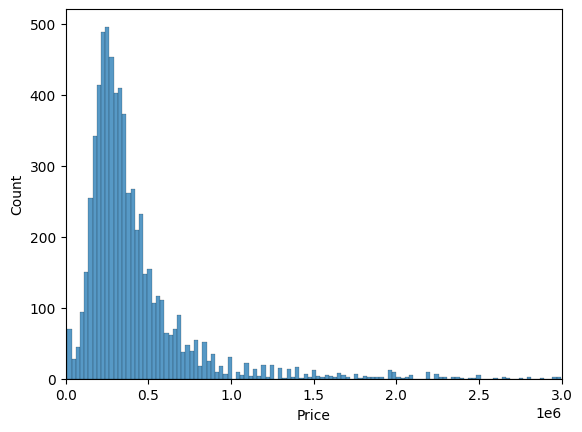

In [34]:
sns.histplot(x="Price", data=properties_raw)
plt.xlim(0, 3000000)
plt.show()